In [1]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

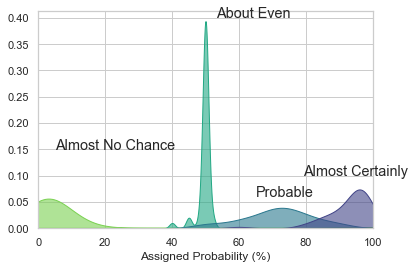

In [2]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# load dataset from github and convert it to a long format
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# take only "Almost No Chance", "About Even", "Probable", "Almost Certainly"
data = data.loc[data.text.isin(["Almost No Chance","About Even","Probable","Almost Certainly"])]

# density plot
p = sns.kdeplot(data=data, x="value", hue="text", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
plt.xlim(0, 100)

# dataframe for annotations
annot = pd.DataFrame({
'x': [5, 53, 65, 79],
'y': [0.15, 0.4, 0.06, 0.1],
'text': ["Almost No Chance", "About Even", "Probable", "Almost Certainly"]
})

# add annotations one by one with a loop
for point in range(0,len(annot)):
     p.text(annot.x[point], annot.y[point], annot.text[point], horizontalalignment='left', size='large')

# add axis names        
plt.xlabel("Assigned Probability (%)")
plt.ylabel("")
        
# show the graph
plt.show()